In [32]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# loading iris dataset from sklearn
iris = load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] + 
                       ['species'])
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [34]:
# combining two similar categories into one
X_df = iris_df.loc[:, ['sepal.width', 'petal.width']]
X_df = X_df.values
y_df = (iris_df.species != 0) * 1
y_df = y_df.values.reshape((y_df.shape[0], 1))

In [36]:
train_index = np.random.choice(len(X_df), round(len(X_df) * 0.8), replace=False)

test_index = np.array(list(set(range(len(X_df))) - set(train_index)))
train_X = X_df[train_index]
train_y = y_df[train_index]
test_X = X_df[test_index]
test_y = y_df[test_index]

In [37]:
mod_iris = iris_df
mod_iris.species = (mod_iris.species != 0) * 1

exp_dat = mod_iris.loc[:, ['sepal.width', 'petal.width']]
labels = mod_iris.loc[:, ['species']]
exp_dat.to_csv("columns.csv", index=False)
labels.to_csv("labels.csv", index=False)

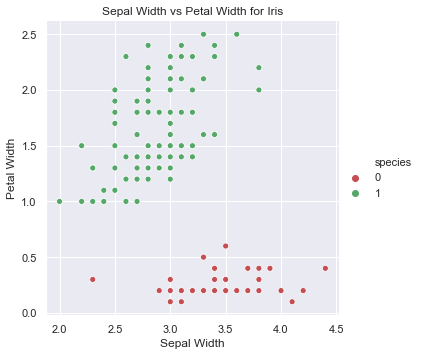

In [41]:
sns.set()
sns.relplot(x = "sepal.width", y = "petal.width", data = iris_df, hue = "species", palette = ['r', 'g'])
plt.title("Sepal Width vs Petal Width for Iris")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.show()

In [28]:
iris_df['species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
model = Sequential()
model.add(Dense(1, 
                activation='sigmoid',
                input_dim=2))  # input dimension = number of features your data has
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_X, train_y, epochs=150)
model.evaluate(test_X, test_y, verbose=1)

Epoch 1/150
120/120 [==============================] - 0s 1ms/step - loss: 0.3203 - acc: 1.0000
Epoch 2/150
120/120 [==============================] - 0s 43us/step - loss: 0.3190 - acc: 1.0000
Epoch 3/150
120/120 [==============================] - 0s 39us/step - loss: 0.3176 - acc: 1.0000
Epoch 4/150
120/120 [==============================] - 0s 50us/step - loss: 0.3162 - acc: 1.0000
Epoch 5/150
120/120 [==============================] - 0s 41us/step - loss: 0.3150 - acc: 1.0000
Epoch 6/150
120/120 [==============================] - 0s 44us/step - loss: 0.3135 - acc: 1.0000
Epoch 7/150
120/120 [==============================] - 0s 46us/step - loss: 0.3121 - acc: 1.0000
Epoch 8/150
120/120 [==============================] - 0s 43us/step - loss: 0.3110 - acc: 1.0000
Epoch 9/150
120/120 [==============================] - 0s 38us/step - loss: 0.3095 - acc: 1.0000
Epoch 10/150
120/120 [==============================] - 0s 46us/step - loss: 0.3082 - acc: 1.0000
Epoch 11/150
120/120 [========

120/120 [==============================] - 0s 44us/step - loss: 0.2366 - acc: 1.0000
Epoch 85/150
120/120 [==============================] - 0s 45us/step - loss: 0.2359 - acc: 1.0000
Epoch 86/150
120/120 [==============================] - 0s 41us/step - loss: 0.2352 - acc: 1.0000
Epoch 87/150
120/120 [==============================] - 0s 44us/step - loss: 0.2345 - acc: 1.0000
Epoch 88/150
120/120 [==============================] - 0s 59us/step - loss: 0.2337 - acc: 1.0000
Epoch 89/150
120/120 [==============================] - 0s 48us/step - loss: 0.2331 - acc: 1.0000
Epoch 90/150
120/120 [==============================] - 0s 46us/step - loss: 0.2323 - acc: 1.0000
Epoch 91/150
120/120 [==============================] - 0s 46us/step - loss: 0.2317 - acc: 1.0000
Epoch 92/150
120/120 [==============================] - 0s 42us/step - loss: 0.2309 - acc: 1.0000
Epoch 93/150
120/120 [==============================] - 0s 39us/step - loss: 0.2302 - acc: 1.0000
Epoch 94/150
120/120 [===========

[0.15913686156272888, 1.0]